In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("US_Accidents_March23.csv")
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
data.shape

(7728394, 46)

In [4]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
data.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [6]:
data.shape

(7728394, 46)

In [7]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Creating a DataFrame with only numerical columns
numerical_data = data[numerical_columns]
numerical_data.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,3,39.865147,-84.058723,NaN,NaN,0.01,36.9,NaN,91.0,29.68,10.0,NaN,0.02
1,2,39.928059,-82.831184,NaN,NaN,0.01,37.9,NaN,100.0,29.65,10.0,NaN,0.00
2,2,39.063148,-84.032608,NaN,NaN,0.01,36.0,33.3,100.0,29.67,10.0,3.5,NaN
3,3,39.747753,-84.205582,NaN,NaN,0.01,35.1,31.0,96.0,29.64,9.0,4.6,NaN
4,2,39.627781,-84.188354,NaN,NaN,0.01,36.0,33.3,89.0,29.65,6.0,3.5,NaN


In [8]:
numerical_data.isna().sum()

Severity                   0
Start_Lat                  0
Start_Lng                  0
End_Lat              3402762
End_Lng              3402762
Distance(mi)               0
Temperature(F)        163853
Wind_Chill(F)        1999019
Humidity(%)           174144
Pressure(in)          140679
Visibility(mi)        177098
Wind_Speed(mph)       571233
Precipitation(in)    2203586
dtype: int64

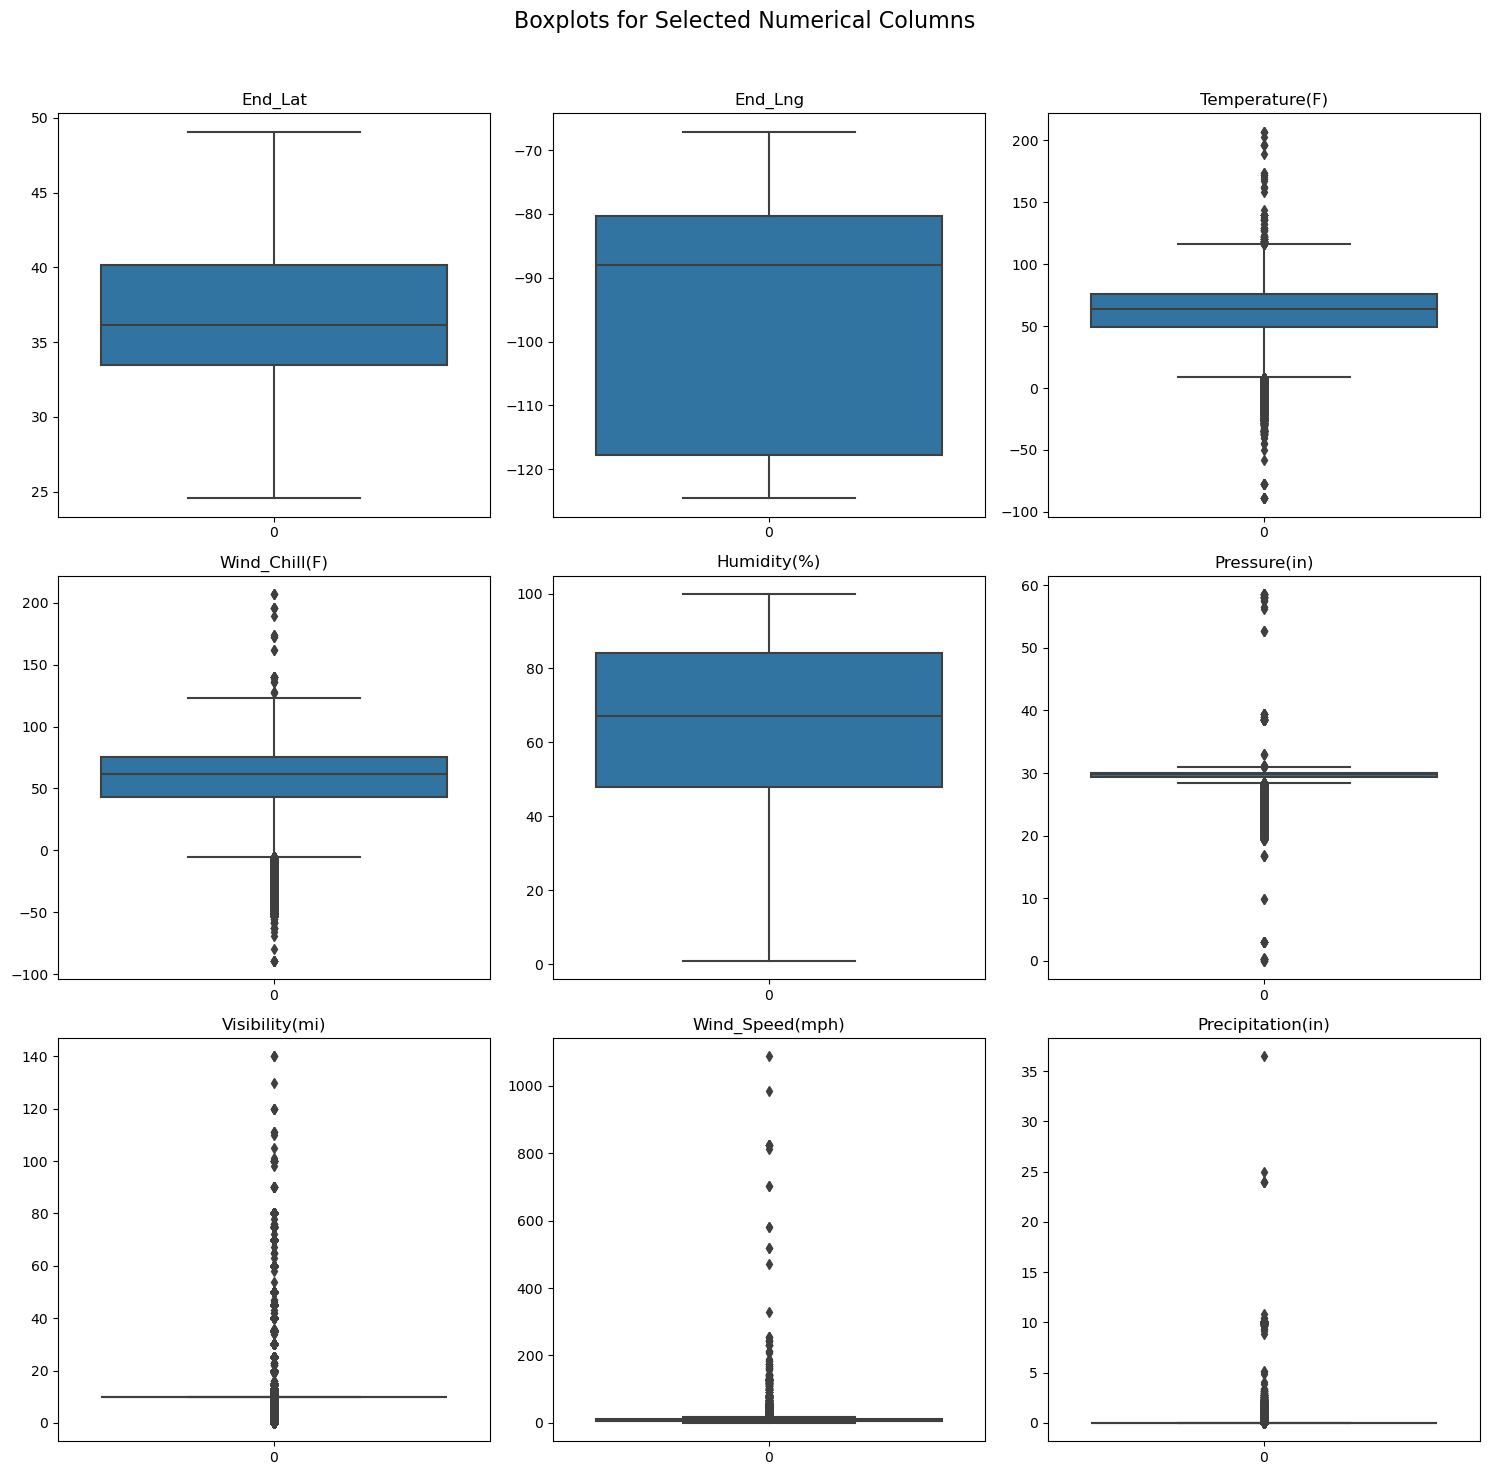

In [9]:
columns = [
    'End_Lat', 'End_Lng', 'Temperature(F)', 'Wind_Chill(F)', 
    'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 
    'Wind_Speed(mph)', 'Precipitation(in)'
]

# Create a subplot layout
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle('Boxplots for Selected Numerical Columns', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each specified column
for ax, col in zip(axes, columns):
    sns.boxplot(data=data[col], ax=ax)
    ax.set_title(col)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [10]:
data = data.drop(columns=[
    'End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Precipitation(in)', 'Airport_Code'
])

data['Temperature(F)'] = data['Temperature(F)'].fillna(data['Temperature(F)'].mean())
data['Humidity(%)'] = data['Humidity(%)'].fillna(data['Humidity(%)'].median())
data['Pressure(in)'] = data['Pressure(in)'].fillna(data['Pressure(in)'].median())
data['Visibility(mi)'] = data['Visibility(mi)'].fillna(data['Visibility(mi)'].median())
data['Wind_Direction'] = data['Wind_Direction'].fillna(data['Wind_Direction'].mode()[0])
data['Wind_Speed(mph)'] = data['Wind_Speed(mph)'].fillna(data['Wind_Speed(mph)'].median())
data['Weather_Condition'] = data['Weather_Condition'].fillna(data['Weather_Condition'].mode()[0])
data['Description'] = data['Description'].fillna('No Description')
data['Street'] = data['Street'].fillna('Unknown Street')
data['City'] = data['City'].fillna('Unknown City')
data['Zipcode'] = data['Zipcode'].fillna('Unknown Zipcode')
data['Timezone'] = data['Timezone'].fillna('Unknown Timezone')
data['Sunrise_Sunset'] = data['Sunrise_Sunset'].fillna(data['Sunrise_Sunset'].mode()[0])
data['Civil_Twilight'] = data['Civil_Twilight'].fillna(data['Civil_Twilight'].mode()[0])
data['Nautical_Twilight'] = data['Nautical_Twilight'].fillna(data['Nautical_Twilight'].mode()[0])
data['Astronomical_Twilight'] = data['Astronomical_Twilight'].fillna(data['Astronomical_Twilight'].mode()[0])

In [11]:
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,False,False,False,True,False,Day,Day,Day,Day


In [12]:
data.isna().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   0
Street                        0
City                          0
County                        0
State                         0
Zipcode                       0
Country                       0
Timezone                      0
Weather_Timestamp        120228
Temperature(F)                0
Humidity(%)                   0
Pressure(in)                  0
Visibility(mi)                0
Wind_Direction                0
Wind_Speed(mph)               0
Weather_Condition             0
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabo

In [13]:
data.shape

(7728394, 41)

In [14]:
data = data.dropna(subset=['Weather_Timestamp'])

In [15]:
data.isna().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
S

In [16]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Weather_Timestamp',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [17]:
data['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', 'Fair',
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow', 'Hea

In [18]:
len(data['Weather_Condition'].unique())

144

In [19]:
def categorize_weather(condition):
    if 'Rain' in condition or 'Drizzle' in condition or 'Shower' in condition or 'Thunder' in condition:
        return 'Rainy'
    elif 'Snow' in condition or 'Sleet' in condition or 'Hail' in condition:
        return 'Snowy'
    elif 'Fog' in condition or 'Mist' in condition or 'Haze' in condition:
        return 'Foggy'
    elif 'Storm' in condition or 'Tornado' in condition or 'Sandstorm' in condition:
        return 'Stormy'
    elif 'Windy' in condition or 'Blowing' in condition or 'Whirlwinds' in condition:
        return 'Windy'
    else:
        return 'Other'

data['Weather_Category'] = data['Weather_Condition'].apply(categorize_weather)

In [20]:
weather_mapping = {
    'Clear': [
        'Clear', 'Fair', 'Fair / Windy'
    ],
    'Cloudy': [
        'Overcast', 'Mostly Cloudy', 'Scattered Clouds', 'Partly Cloudy', 'Cloudy',
        'Cloudy / Windy', 'Mostly Cloudy / Windy', 'Partly Cloudy / Windy'
    ],
    'Rain': [
        'Light Rain', 'Rain', 'Heavy Rain', 'Light Rain Showers', 'Rain Showers', 'Light Rain Shower',
        'Light Rain with Thunder', 'Rain / Windy', 'Heavy Rain / Windy', 'Heavy Rain Showers',
        'Rain Shower', 'Rain Shower / Windy'
    ],
    'Drizzle': [
        'Light Drizzle', 'Drizzle', 'Heavy Drizzle', 'Drizzle and Fog', 'Drizzle / Windy'
    ],
    'Snow': [
        'Light Snow', 'Snow', 'Heavy Snow', 'Light Snow Shower', 'Snow Showers', 'Snow / Windy',
        'Light Snow / Windy', 'Heavy Snow / Windy', 'Light Snow Showers', 'Snow and Sleet', 'Light Snow and Sleet',
        'Snow and Sleet / Windy', 'Light Snow and Sleet / Windy', 'Snow Grains', 'Light Snow Grains', 'Heavy Blowing Snow',
        'Light Blowing Snow', 'Blowing Snow', 'Blowing Snow / Windy', 'Blowing Snow Nearby'
    ],
    'Fog': [
        'Fog', 'Shallow Fog', 'Patches of Fog', 'Light Fog', 'Fog / Windy', 'Patches of Fog / Windy',
        'Partial Fog', 'Partial Fog / Windy', 'Heavy Fog'
    ],
    'Thunderstorm': [
        'Thunderstorms and Rain', 'Light Thunderstorms and Rain', 'Thunderstorm', 'T-Storm',
        'Heavy Thunderstorms and Rain', 'Heavy T-Storm', 'Thunder', 'Thunder / Windy', 'T-Storm / Windy',
        'Thunder in the Vicinity', 'Light Thunderstorm', 'Heavy Thunderstorms with Small Hail', 'Thunder and Hail',
        'Thunder and Hail / Windy', 'Thunderstorms and Snow', 'Light Thunderstorms and Snow', 'Heavy Thunderstorms and Snow',
        'Thunder / Wintry Mix', 'Thunder / Wintry Mix / Windy', 'Thunder and Hail / Windy', 'Heavy Thunderstorms and Rain',
        'Thunderstorm'
    ],
    'Hail': [
        'Hail', 'Small Hail', 'Heavy Hail', 'Thunder and Hail', 'Thunder and Hail / Windy'
    ],
    'Mist': [
        'Mist', 'Mist / Windy'
    ],
    'Smoke': [
        'Smoke', 'Smoke / Windy', 'Heavy Smoke'
    ],
    'Dust': [
        'Blowing Dust', 'Blowing Dust / Windy', 'Widespread Dust', 'Widespread Dust / Windy', 'Dust Whirls',
        'Duststorm', 'Sand', 'Sand / Windy', 'Sand / Dust Whirls Nearby', 'Sand / Dust Whirlwinds', 'Sand / Dust Whirlwinds / Windy'
    ],
    'Ice Pellets': [
        'Light Ice Pellets', 'Ice Pellets', 'Heavy Ice Pellets'
    ],
    'Freezing Rain': [
        'Light Freezing Rain', 'Freezing Rain', 'Heavy Freezing Rain', 'Light Freezing Rain / Windy',
        'Heavy Freezing Rain / Windy'
    ],
    'Sleet': [
        'Sleet', 'Light Sleet', 'Heavy Sleet', 'Light Sleet / Windy', 'Sleet / Windy', 'Rain and Sleet', 'Sleet and Thunder',
        'Heavy Sleet and Thunder', 'Heavy Sleet / Windy'
    ],
    'Volcanic Ash': [
        'Volcanic Ash'
    ],
    'Squalls': [
        'Squalls', 'Squalls / Windy'
    ],
    'Wintry Mix': [
        'Wintry Mix', 'Wintry Mix / Windy'
    ],
    'N/A': [
        'N/A Precipitation'
    ]
}

reverse_mapping = {condition: category for category, conditions in weather_mapping.items() for condition in conditions}

# Apply the mapping
data['Weather_category'] = data['Weather_Condition'].map(reverse_mapping)

In [21]:
data['Weather_category'].unique()

array(['Rain', 'Cloudy', 'Snow', nan, 'Clear', 'Drizzle', 'Fog',
       'Freezing Rain', 'Mist', 'Smoke', 'Thunderstorm', 'Volcanic Ash',
       'Dust', 'Hail', 'Ice Pellets', 'Squalls', 'N/A', 'Wintry Mix',
       'Sleet'], dtype=object)

In [22]:
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Category,Weather_category
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,False,False,Night,Night,Night,Night,Rainy,Rain
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,False,False,Night,Night,Night,Day,Rainy,Rain
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,False,True,False,Night,Night,Day,Day,Other,Cloudy
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,False,False,Night,Day,Day,Day,Other,Cloudy
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,False,True,False,Day,Day,Day,Day,Other,Cloudy


In [23]:
data.isna().sum()

ID                           0
Source                       0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
Distance(mi)                 0
Description                  0
Street                       0
City                         0
County                       0
State                        0
Zipcode                      0
Country                      0
Timezone                     0
Weather_Timestamp            0
Temperature(F)               0
Humidity(%)                  0
Pressure(in)                 0
Visibility(mi)               0
Wind_Direction               0
Wind_Speed(mph)              0
Weather_Condition            0
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabout                   0
Station 

In [24]:
data['Weather_Category'].unique()

array(['Rainy', 'Other', 'Snowy', 'Foggy', 'Windy', 'Stormy'],
      dtype=object)

In [25]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Weather_Timestamp',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Weather_Category', 'Weather_category'],
      dtype='object')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


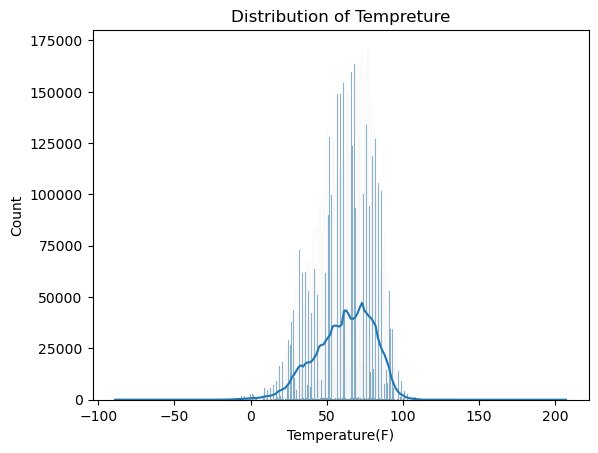

In [26]:
sns.histplot(data['Temperature(F)'],kde=True)
plt.title("Distribution of Tempreture")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


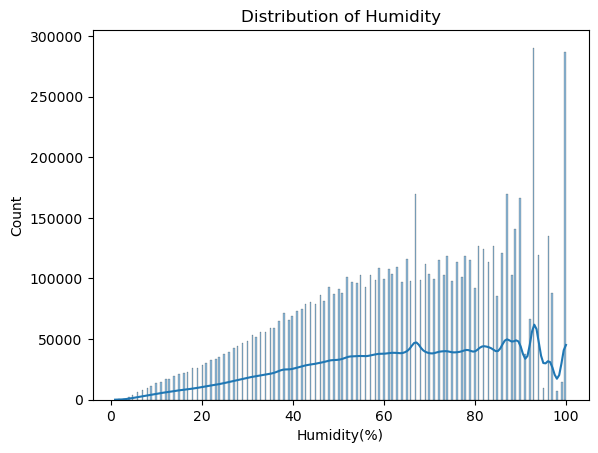

In [27]:
sns.histplot(data['Humidity(%)'],kde=True)
plt.title("Distribution of Humidity")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


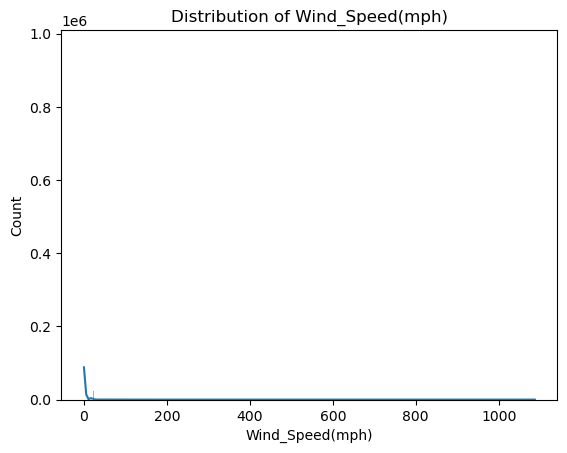

In [28]:
sns.histplot(data['Wind_Speed(mph)'],kde=True)
plt.title("Distribution of Wind_Speed(mph)")
plt.show()

In [29]:
data['Wind_Speed(mph)'].unique()

array([7.000e+00, 3.500e+00, 4.600e+00, 1.200e+00, 5.800e+00, 2.300e+00,
       6.900e+00, 8.100e+00, 1.040e+01, 9.200e+00, 1.150e+01, 1.380e+01,
       1.500e+01, 1.270e+01, 1.960e+01, 2.190e+01, 1.840e+01, 2.530e+01,
       1.610e+01, 2.420e+01, 2.300e+01, 1.730e+01, 2.760e+01, 2.990e+01,
       2.070e+01, 1.000e+01, 2.650e+01, 5.000e+00, 3.110e+01, 3.340e+01,
       2.880e+01, 3.570e+01, 4.260e+01, 3.680e+01, 3.220e+01, 4.030e+01,
       1.427e+02, 7.360e+01, 6.900e+01, 3.800e+01, 8.000e+00, 9.000e+00,
       3.000e+00, 1.400e+01, 0.000e+00, 1.200e+01, 6.000e+00, 1.300e+01,
       1.000e+00, 2.000e+00, 4.720e+01, 1.700e+01, 1.600e+01, 2.100e+01,
       2.800e+01, 2.000e+01, 2.600e+01, 1.800e+01, 2.200e+01, 5.750e+01,
       3.450e+01, 2.417e+02, 2.400e+01, 1.001e+02, 1.231e+02, 8.228e+02,
       4.140e+01, 1.623e+02, 6.670e+01, 3.000e+01, 2.900e+01, 1.266e+02,
       1.277e+02, 2.500e+01, 3.910e+01, 5.410e+01, 9.780e+01, 7.600e+01,
       1.749e+02, 4.490e+01, 3.200e+01, 3.300e+01, 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


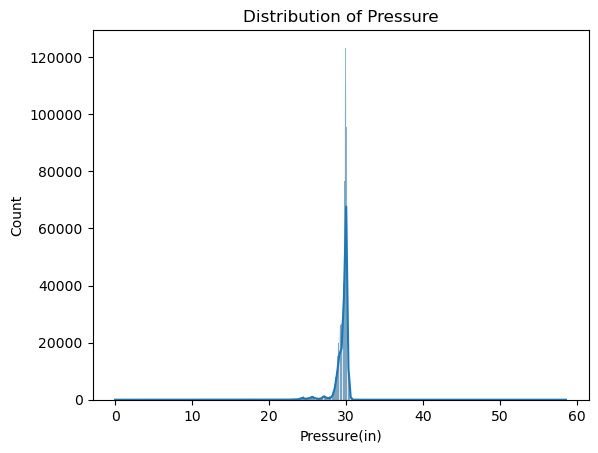

In [30]:
sns.histplot(data['Pressure(in)'],kde=True)
plt.title("Distribution of Pressure")
plt.show()

In [31]:
len(data['Pressure(in)'].unique())

1144

In [32]:
data['Distance(mi)'].unique()

array([1.0000e-02, 0.0000e+00, 1.3200e+00, ..., 1.1622e+01, 2.0246e+01,
       3.6350e+01])

In [33]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Weather_Timestamp',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Weather_Category', 'Weather_category'],
      dtype='object')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7608166 entries, 0 to 7728393
Data columns (total 43 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   Distance(mi)           float64
 8   Description            object 
 9   Street                 object 
 10  City                   object 
 11  County                 object 
 12  State                  object 
 13  Zipcode                object 
 14  Country                object 
 15  Timezone               object 
 16  Weather_Timestamp      object 
 17  Temperature(F)         float64
 18  Humidity(%)            float64
 19  Pressure(in)           float64
 20  Visibility(mi)         float64
 21  Wind_Direction         object 
 22  Wind_Speed(mph)        

In [35]:
data['Start_Lat'].unique()

array([39.865147, 39.928059, 39.063148, ..., 34.120911, 33.943599,
       34.239104])

C:\Users\User\AppData\Local\Temp\ipykernel_9492\1006103936.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Start_Lat'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


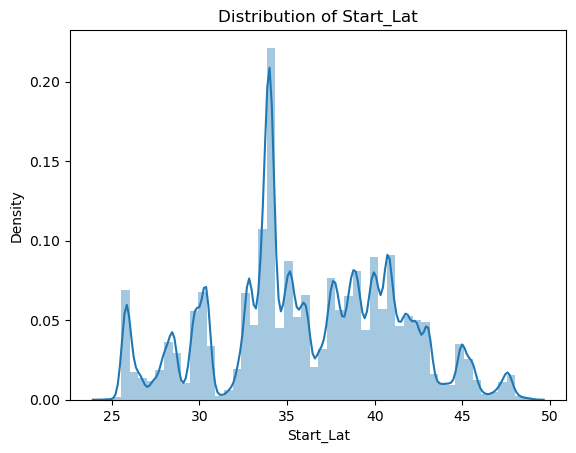

In [36]:
sns.distplot(data['Start_Lat'])
plt.title("Distribution of Start_Lat")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_12064\3368639688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Start_Lng'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


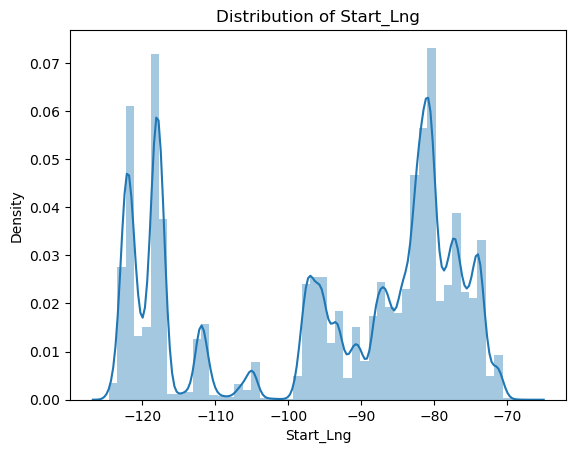

In [40]:
sns.distplot(data['Start_Lng'])
plt.title("Distribution of Start_Lng")
plt.show()

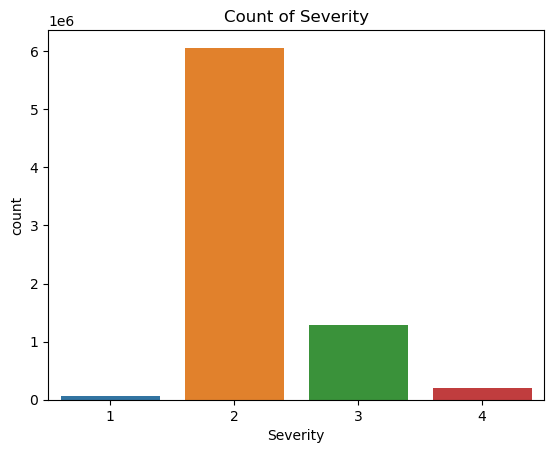

In [37]:
sns.countplot(x='Severity', data=data)
plt.title("Count of Severity")
plt.show()

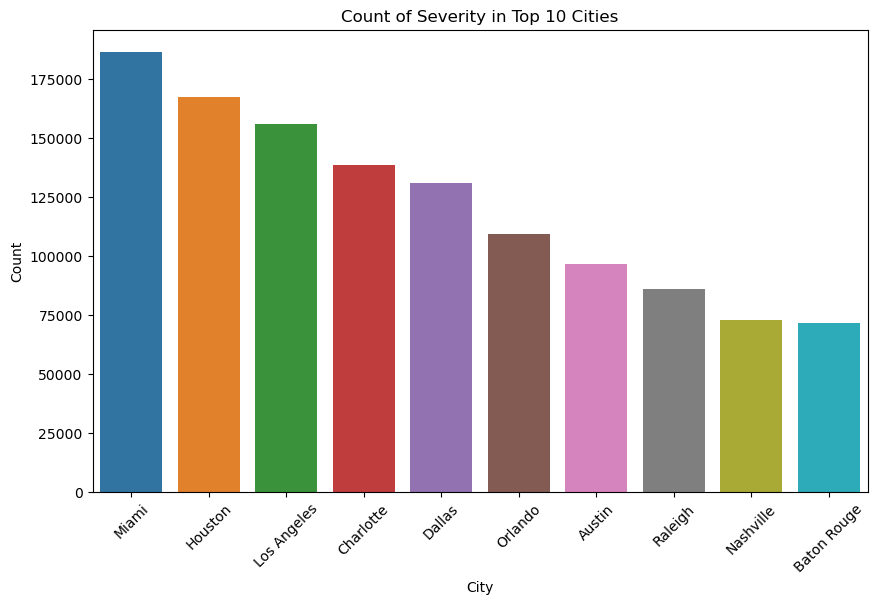

In [38]:
top_cities = data['City'].value_counts().nlargest(10).index
top_data = data[data['City'].isin(top_cities)]

# Plot the count of the top 10 cities
plt.figure(figsize=(10, 6))
sns.countplot(x='City', data=top_data, order=top_cities)
plt.title("Count of Severity in Top 10 Cities")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [39]:
len(data['State'].unique())

49

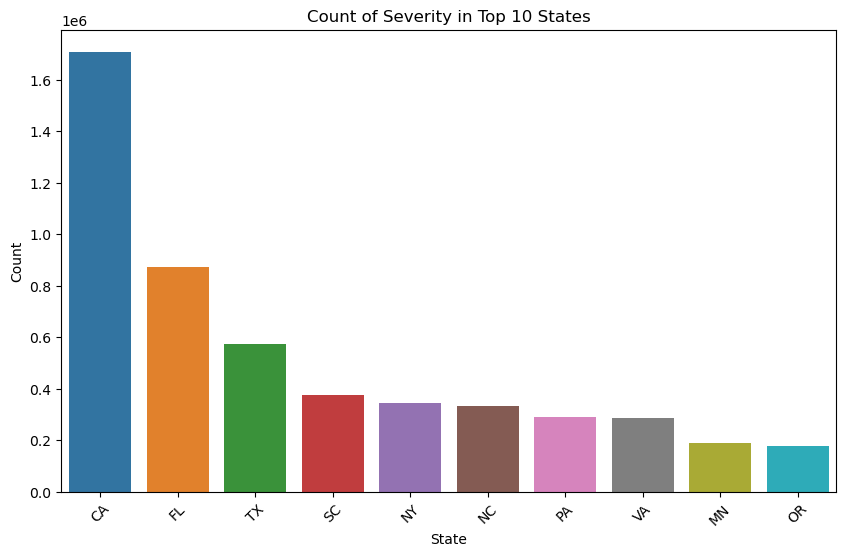

In [40]:
top_states = data['State'].value_counts().nlargest(10).index
top_data = data[data['State'].isin(top_states)]

# Plot the count of the top 10 cities
plt.figure(figsize=(10, 6))
sns.countplot(x='State', data=top_data, order=top_states)
plt.title("Count of Severity in Top 10 States")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [41]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Weather_Timestamp',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Weather_Category', 'Weather_category'],
      dtype='object')

In [42]:
data['Wind_Direction'].unique()

array(['Calm', 'SW', 'SSW', 'WSW', 'WNW', 'NW', 'West', 'NNW', 'NNE',
       'South', 'North', 'Variable', 'SE', 'SSE', 'ESE', 'East', 'NE',
       'ENE', 'E', 'W', 'S', 'VAR', 'CALM', 'N'], dtype=object)

In [43]:
direction_map = {
    'N': ['N', 'NNW', 'NNE'],
    'NE': ['NE', 'ENE'],
    'E': ['E', 'ESE', 'ENE'],
    'SE': ['SE', 'SSE'],
    'S': ['S', 'SSW', 'SSE'],
    'SW': ['SW', 'WSW'],
    'W': ['W', 'WNW', 'WSW'],
    'NW': ['NW', 'NNW'],
    'Calm': ['Calm', 'CALM'],
    'Variable': ['Variable', 'VAR']
}

reverse_map = {direction: category for category, directions in direction_map.items() for direction in directions}

data['Wind_Category'] = data['Wind_Direction'].map(reverse_map)

# Count occurrences of each wind category
wind_counts = data['Wind_Category'].value_counts().reset_index()
wind_counts.columns = ['Wind_Category', 'Count']

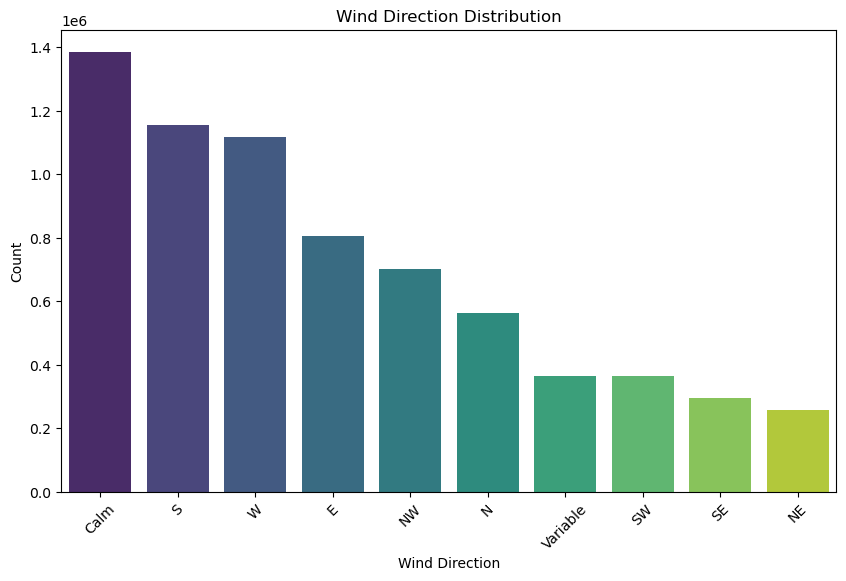

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Wind_Category', y='Count', data=wind_counts, palette='viridis')
plt.title('Wind Direction Distribution')
plt.xlabel('Wind Direction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [45]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Weather_Timestamp',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Weather_Category', 'Weather_category',
       'Wind_Category'],
      dtype='object')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7608166 entries, 0 to 7728393
Data columns (total 44 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   Distance(mi)           float64
 8   Description            object 
 9   Street                 object 
 10  City                   object 
 11  County                 object 
 12  State                  object 
 13  Zipcode                object 
 14  Country                object 
 15  Timezone               object 
 16  Weather_Timestamp      object 
 17  Temperature(F)         float64
 18  Humidity(%)            float64
 19  Pressure(in)           float64
 20  Visibility(mi)         float64
 21  Wind_Direction         object 
 22  Wind_Speed(mph)        

In [47]:
data['Weather_Category'].unique()

array(['Rainy', 'Other', 'Snowy', 'Foggy', 'Windy', 'Stormy'],
      dtype=object)

In [48]:
data.isna().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   0
Street                        0
City                          0
County                        0
State                         0
Zipcode                       0
Country                       0
Timezone                      0
Weather_Timestamp             0
Temperature(F)                0
Humidity(%)                   0
Pressure(in)                  0
Visibility(mi)                0
Wind_Direction                0
Wind_Speed(mph)               0
Weather_Condition             0
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabo